Copyright 2021 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Statistics - Session 1 - Exercises

Below are a few simple exercises or examples on probability to be discussed in the breakout rooms.

## Exercise 1 - Bayes rule for COVID diagnosis

Ref: [slides](https://docs.google.com/presentation/d/1UbAAhmCDJPnUsbKtaiEZnvwSUDYO5XG89fynGQAEnX4/edit?resourcekey=0-sYwZZm77lY9ZV1Uabe227Q#slide=id.gd0c69af6f6_0_56).

Consider estimating if someone has COVID $H=1$ or not $H=0$ on the basis of a PCR test. The test can either return a positive result $Y=1$ or a negative result $Y=0$. The reliability of the test is given by the following confusion matrix:

<table>
<tr>
<th colspan="2" rowspan="2">
<th colspan="2">Observation
</tr>
<tr>
<th>0
<th>1
</tr>
<tr>
<th rowspan="2">Truth
<th>0
<td>True Negative Rate (TNR) = Specificity
<td>False Positive Rate (FPR) = 1 - TNR
</tr>
<tr>
<th>1
<td>False Negative Rate (FNR) = 1 - TPR
<td>True Positive Rate (TPR) = Sensitivity
</tr>
</table>

Using data from the [New York Times](https://www.nytimes.com/2020/08/04/science/coronavirus-bayes-statistics-math.html), we set **sensitivity** to 87.5\% and **specificity** to 97.5\%.

We also need to specify the prior probability $p(H=1)$; known as the **prevalence**. This varies over time and place, but let's pick $p(H=1)=0.1$ as a reasonable estimate.

If you test positive:

\begin{align}
p(H=1|Y=1) 
 &= \frac{p(Y=1|H=1) p(H=1)}
{p(Y=1|H=1) p(H=1) + p(Y=1|H=0) p(H=0)}
= 0.795
\end{align}

If you test negative:
\begin{align}
p(H=1|Y=0) 
 &= \frac{p(Y=0|H=1) p(H=1)}
{p(Y=0|H=1) p(H=1) + p(Y=0|H=0) p(H=0)}
=0.014
\end{align}

**Exercise**: Using the code below, explore how the resulting probabilities depend on the sensitivity and specificity of the test, as well as on the prevalence.

In [ ]:
import numpy as np

def normalize(x):
  return x / np.sum(x)

def posterior_covid(observed, prevalence=None, sensitivity=None):
  # observed = 0 for negative test, 1 for positive test
  # hidden state = 0 if no-covid, 1 if have-covid
  if sensitivity is None:
    sensitivity = 0.875
  specificity = 0.975
  TPR = sensitivity; 
  FNR = 1-TPR
  TNR = specificity
  FPR = 1-TNR
  # likelihood(hidden, obs)
  likelihood_fn = np.array([[TNR, FPR], [FNR, TPR]])
  # prior(hidden)
  if prevalence is None:
    prevalence = 0.1
  prior = np.array([1-prevalence, prevalence])
  likelihood = likelihood_fn[:, observed].T
  posterior = normalize(prior * likelihood)
  return posterior

For a prevalence of $p(H=1)=0.1$

In [ ]:
print(posterior_covid(1)[1]*100)
print(posterior_covid(0)[1]*100)


79.54545454545453
1.4044943820224722


For a prevalence of $p(H=1)=0.01$

In [ ]:
print(posterior_covid(1, 0.01)[1]*100)
print(posterior_covid(0, 0.01)[1]*100)

26.119402985074615
0.12933264355923438


## Exercise 2 - Simpson's paradox in Covid-19 case mortality Italy vs. China

**Discussion**: Discuss this section and see if you can understand it intuitively. How would you notice that you need to consider Simpson's paradox? Can you apply Bayes' rule to understand the conditions when Simpson's paradox occurs?

Ref:
* [book pml1](https://probml.github.io/pml-book/book1.html), C.4.6, page 747f, 
* [this paper](https://arxiv.org/abs/2005.07180),
* [wikipedia](https://en.wikipedia.org/wiki/Simpson%27s_paradox).

Simpson’s paradox says that a statistical trend or relationship that appears in several different groups of data can disappear or reverse sign when these groups are combined.

This results in counterintuitive behavior if we misinterpret claims of statistical dependence in a causal way.

A visualization of the paradox is given in the figure below. Overall, we see that $y$ decreases with $x$, but within each subpopulation, $y$ increases with $x$.

<table>
<tr>
<td>

![simpsons paradox](https://upload.wikimedia.org/wikipedia/commons/4/47/Simpson%27s_paradox_continuous.svg)

<td>

![simpsons paradox](https://upload.wikimedia.org/wikipedia/commons/f/fb/Simpsons_paradox_-_animation.gif)

</tr>
</table>

For a recent real-world example of Simpson’s paradox in the context of covid19, consider [this paper](https://arxiv.org/abs/2005.07180).

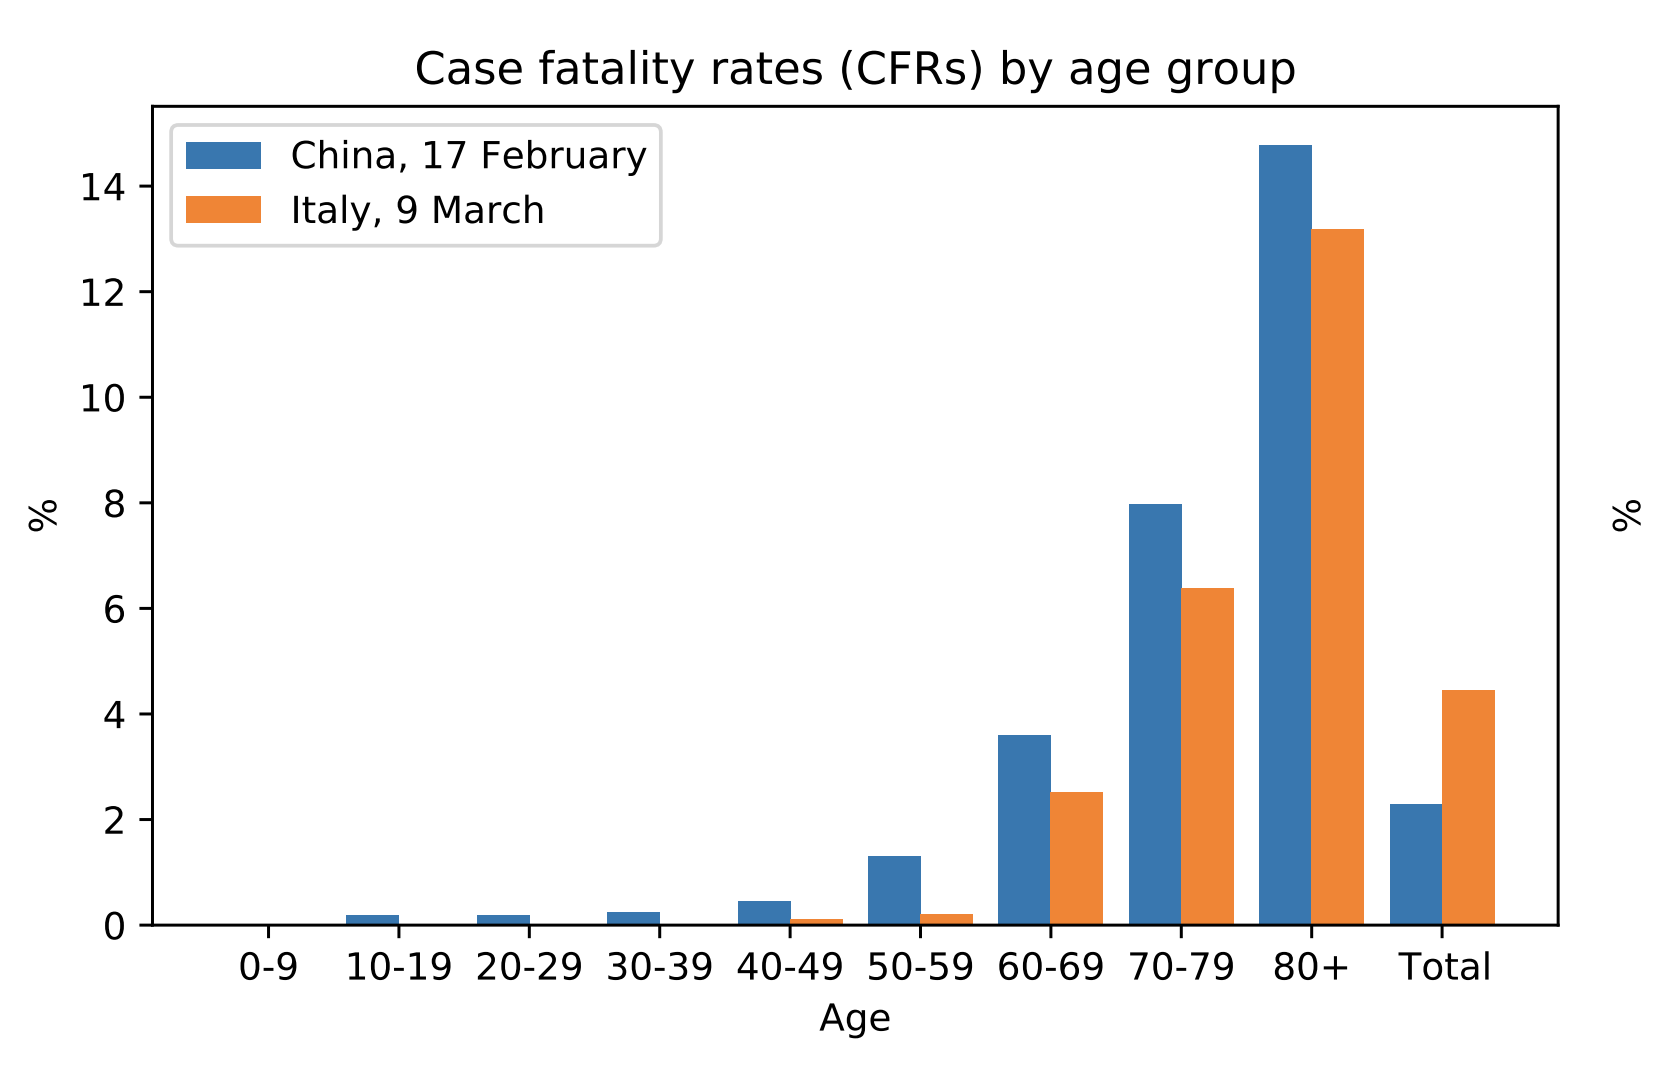

The reason for this is that there are more older people in Italy:

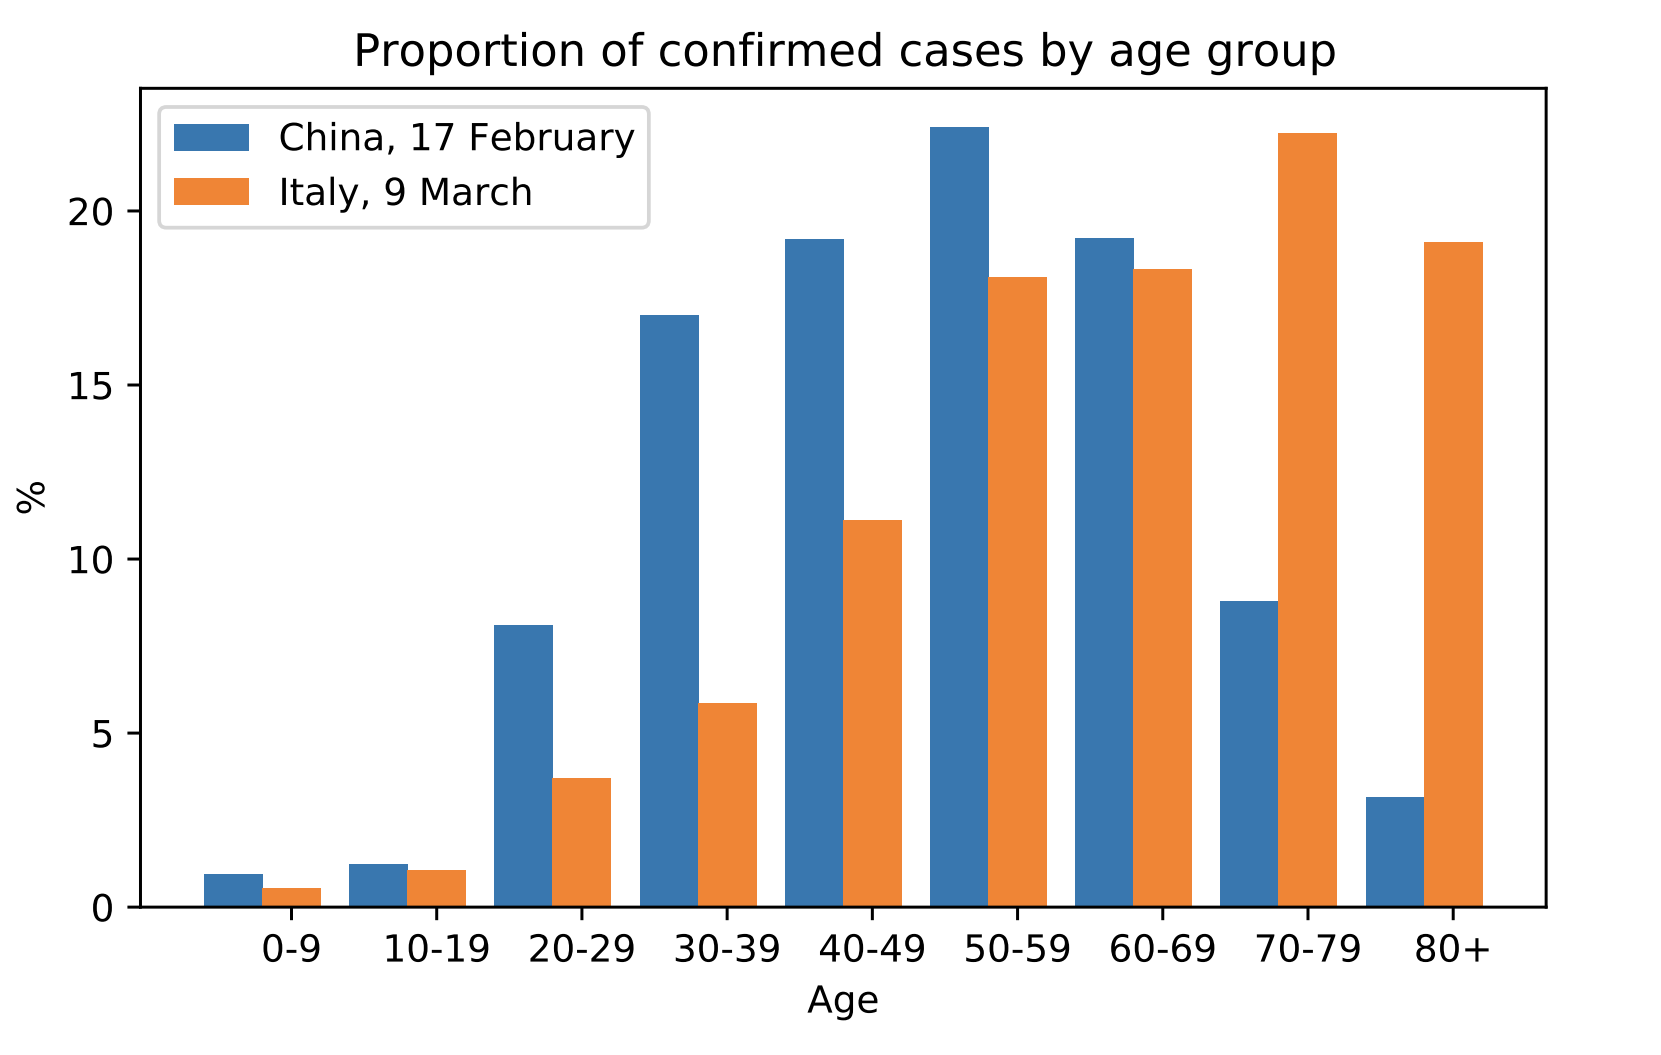

## Exercise 3 - Drawing balls from a bucket

Ref. [E.T. Jaynes Paper](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.46.1264&rep=rep1&type=pdf)

Consider the following reasoning about conditional probabilities when drawing colored balls from a bucket.

### Question 1 - Is the following computation valid?

There are 10 balls in a bucket, 1 red and 9 white ones. We randomly draw one, and then another.

For the first draw, the probability to pick the red ball is

$$P(R) = \frac{1}{10}$$

The probability to pick a white ball is

$$P(W) = \frac{9}{10}$$

For the second draw, if the first draw picked a white ball, the probability of picking the red ball is now

$$P(R|W) = \frac{1}{9}$$

However, if the first ball was the only red one, the probability to pick a white one next becomes 1:

$$P(W|R) = 1$$

Let's check if this is in accordance with Bayes' Rule:

$$P(W|R) = \frac{P(R|W) P(W)}{P(R)} = \frac{\frac{1}{9}\frac{9}{10}}{\frac{1}{10}} = \frac{\frac{1}{10}}{\frac{1}{10}} = 1$$ as we expect.

**Question 1**: Discuss whether this is indeed a correct application of Bayes rule.

**Hint**: Are the random variables $W$ and $R$ indeed the same ones in all expressions $P(R|W)$ or $R(W|R)$?

### More questions to consider:

**Question 2**: What are the probabilities for the color of the second drawn ball if we put away the first ball without looking at it?

**Question 3**: What are the probabilities for the color of the first ball if we look at it only *after* we have drawn the second ball?

**Question 4**: Do the two previous questions even make sense? Why? Why not?

## Exercise 4 - Choice of Basis in a Density Operator

Ref.: [Quantum Computation and Quantum Information](https://www.amazon.com/Quantum-Computation-Information-10th-Anniversary/dp/1107002176), page 103.

Remember how we introduced density operators to represent a probability distribution over some quantum states.

(Following is excerpt from ref above.)

It is, however, a fallacy to assume that the eigenvectors and eigenvalues of a density operator have a special significmace wiith regard to the ensemble of states represented by the density operator..

For example, one might suppose that a quantum system with the density matrix 

$$\rho = \frac{3}{4} |0\rangle\langle0| + \frac{1}{4} |1\rangle\langle1|$$

must be in state $|0\rangle$ with probability $\frac{3}{4}$ and in state $|1\rangle$ with probability $\frac{1}{4}$. However, this is not necessarily the case. Let's define

$$|a\rangle = \sqrt{\frac{3}{4}}|0\rangle + \sqrt{\frac{1}{4}}|1\rangle$$
$$|b\rangle = \sqrt{\frac{3}{4}}|0\rangle - \sqrt{\frac{1}{4}}|1\rangle$$

and the quantum system is prepared to be in state $|a\rangle$ with probability $\frac{1}{2}$ and in state $|b\rangle$ with probability \frac{1}{2}. The resulting density matrix is 

$$\rho = \frac{1}{2} |a\rangle\langle a| + \frac{1}{2} |b\rangle\langle b| = \frac{3}{4} |0\rangle\langle0| + \frac{1}{4} |1\rangle\langle1|$$

That is, two different mixed states give rise to the same density matrix.

**Exercise**: Verify those are indeed the same density operators.

**Discussion**: What does this mean for the "reality" of the probability distribution expressed by the densiity matrix? How does this relate to the "reality" of the probability distribution of the color of the ball in the previous exercise?

## References and further reading

* [Quantum Computation and Quantum Information](https://www.amazon.com/Quantum-Computation-Information-10th-Anniversary/dp/1107002176) (book)
* E.T. Jaynes [Clearing up Mysteries - The Original Goal](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.46.1264&rep=rep1&type=pdf) (paper)
* E.T. Jaynes [Probability Theory. The Logic of Science](https://www.amazon.com/Probability-Theory-Science-T-Jaynes/dp/0521592712) (textbook)